In [ ]:
from google.colab import drive
drive.mount('/content/drive')
data_dir = "/content/drive/My Drive/Aerial classes small"  # Adjust the path


Mounted at /content/drive


In [ ]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the dataset directory paths
train_dir = os.path.join(data_dir, "train")
val_dir = os.path.join(data_dir, "val")
test_dir = os.path.join(data_dir, "test")

# Create ImageDataGenerators
train_datagen = ImageDataGenerator(rescale=1.0/255.0,
                                   rotation_range=20,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   horizontal_flip=True)

val_test_datagen = ImageDataGenerator(rescale=1.0/255.0)

# Load datasets from directories
train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(128, 128),  # Resize images to 128x128
    batch_size=32,          # Adjust batch size as needed
    class_mode='categorical'  # Multiclass classification
)

val_data = val_test_datagen.flow_from_directory(
    val_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical'
)

test_data = val_test_datagen.flow_from_directory(
    test_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical'
)

# Display class indices to ensure proper mapping
print("Class indices:", train_data.class_indices)


Found 350 images belonging to 5 classes.
Found 75 images belonging to 5 classes.
Found 76 images belonging to 5 classes.
Class indices: {'Airplanes': 0, 'Drones': 1, 'Fighterjets': 2, 'Helicopters': 3, 'UAVs': 4}


In [ ]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Create a CNN model
model2 = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(5, activation='softmax')  # 5 classes
])

# Compile the model
model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model2.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       3,211,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 5)                   │             645 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,305,285 (12.61 MB)

 Trainable params: 3,305,285 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


11/11 ━━━━━━━━━━━━━━━━━━━━ 279s 13s/step - accuracy: 0.1565 - loss: 1.7506 - val_accuracy: 0.3200 - val_loss: 1.5894
Epoch 2/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 10s 544ms/step - accuracy: 0.2878 - loss: 1.5846 - val_accuracy: 0.4000 - val_loss: 1.4782
Epoch 3/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 8s 281ms/step - accuracy: 0.3705 - loss: 1.4891 - val_accuracy: 0.5200 - val_loss: 1.3561
Epoch 4/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 9s 231ms/step - accuracy: 0.4309 - loss: 1.3630 - val_accuracy: 0.5600 - val_loss: 1.3169
Epoch 5/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 8s 353ms/step - accuracy: 0.4681 - loss: 1.2500 - val_accuracy: 0.5467 - val_loss: 1.1340
Epoch 6/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 8s 286ms/step - accuracy: 0.5080 - loss: 1.2186 - val_accuracy: 0.5067 - val_loss: 1.1721
Epoch 7/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 11s 295ms/step - accuracy: 0.4164 - loss: 1.2616 - val_accuracy: 0.5733 - val_loss: 1.1367
Epoch 8/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 10s 401ms/step - accuracy: 0.4882 - loss: 1.1407 - val_accuracy: 0.6

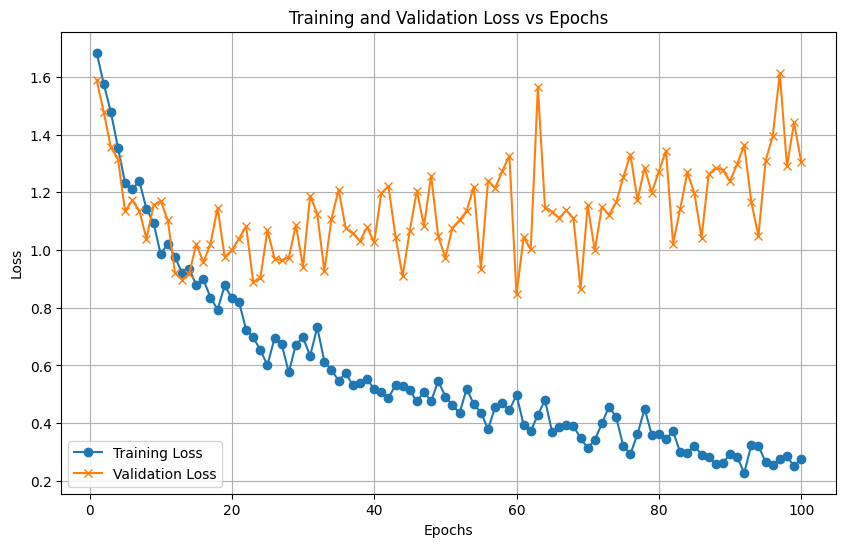

In [ ]:
# Train the model
history = model2.fit(
    train_data,
    validation_data=val_data,
    epochs=100,  # You can adjust the number of epochs
    verbose=1
)

# Import necessary library for plotting
import matplotlib.pyplot as plt

# Extract loss values for plotting
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(train_loss) + 1)

# Plot train and validation loss
plt.figure(figsize=(10, 6))
plt.plot(epochs, train_loss, label='Training Loss', marker='o')
plt.plot(epochs, val_loss, label='Validation Loss', marker='x')
plt.title('Training and Validation Loss vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()
